In [ ]:
pip install pandas numpy matplotlib scikit-learn


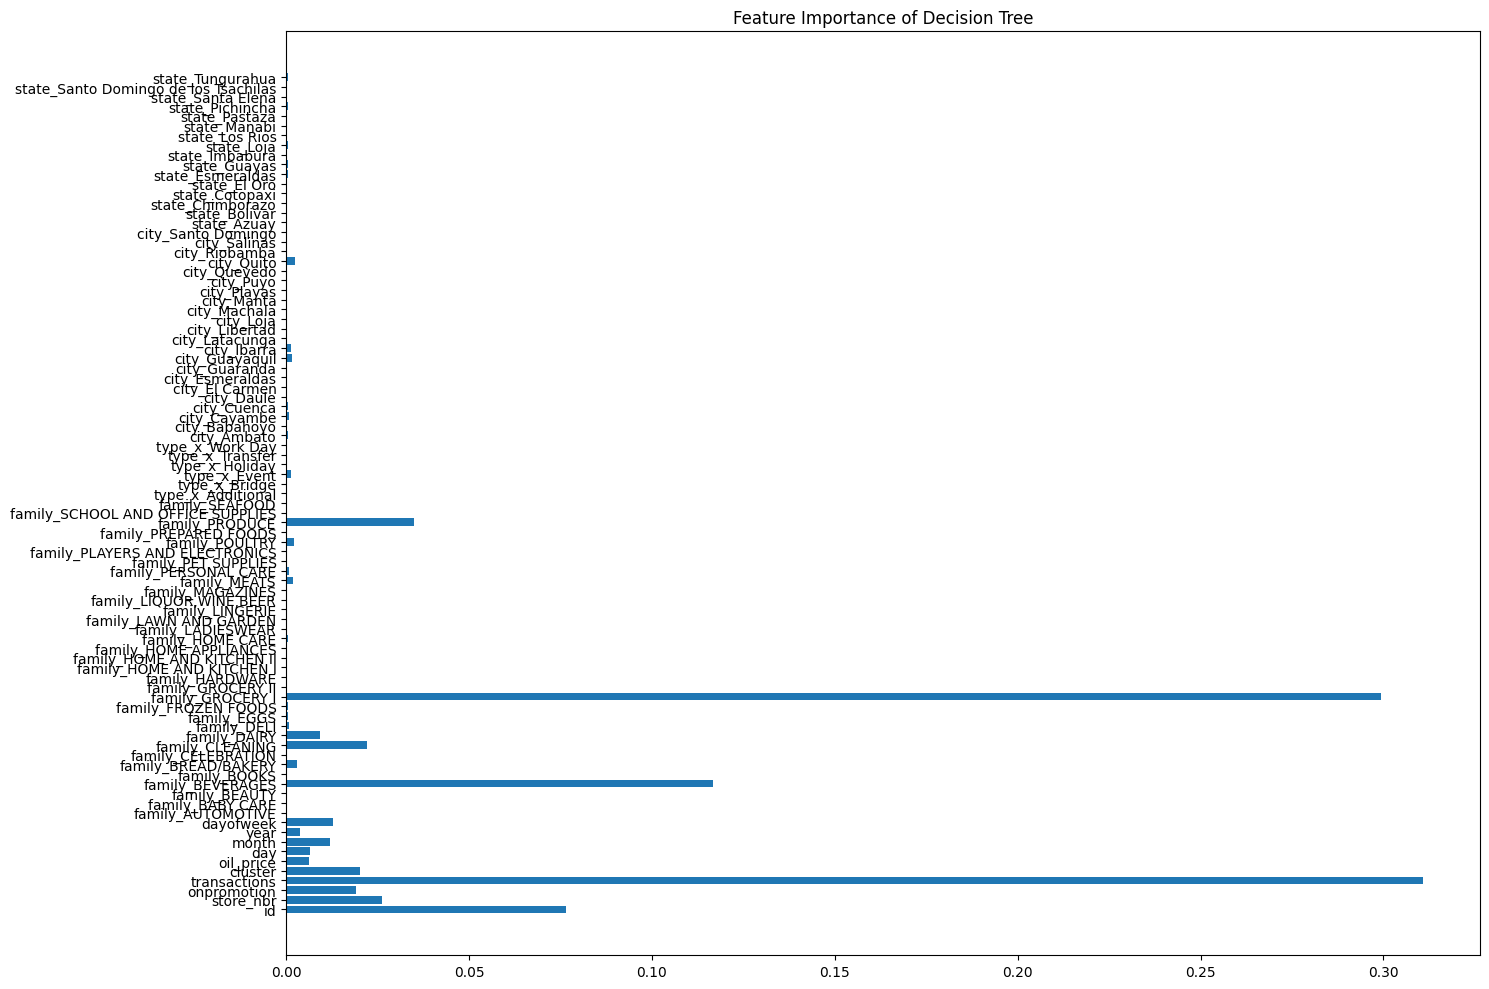


📊 Model Evaluation Metrics:
  Dataset           MSE          MSLE          RMSE         RMSLE
0   Train  8.100021e-30  1.091660e-35  2.846054e-15  3.304027e-18
1    Test  1.077186e+05  2.929592e-01  3.282051e+02  5.412570e-01


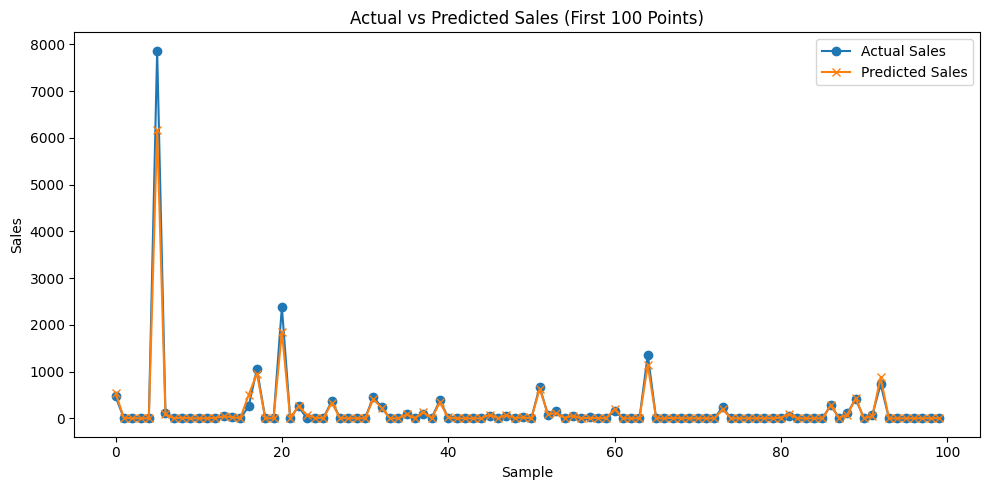

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import pickle
import warnings
warnings.filterwarnings("ignore")

# Step 2: Load the files
train = pd.read_csv('/content/train.csv', parse_dates=['date'])
transactions = pd.read_csv('/content/transactions.csv', parse_dates=['date'])
holidays = pd.read_csv('/content/holidays_events.csv', parse_dates=['date'])
test = pd.read_csv('/content/test.csv', parse_dates=['date'])
stores = pd.read_csv('/content/stores.csv')
oil = pd.read_csv('/content/oil.csv', parse_dates=['date'])

# Step 3: Merge datasets
df = pd.merge(train, transactions, on=['date', 'store_nbr'], how='left')
df = pd.merge(df, holidays, on='date', how='left')
df = pd.merge(df, stores, on='store_nbr', how='left')
df = pd.merge(df, oil.rename(columns={'dcoilwtico': 'oil_price'}), on='date', how='left')

# Step 4: Handle missing values
df['transactions'] = df['transactions'].fillna(df['transactions'].median())
df['type_x'] = df['type_x'].fillna('Holiday')
df['oil_price'] = df['oil_price'].fillna(method='ffill')

# Step 5: Feature Engineering
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofweek'] = df['date'].dt.dayofweek

# Step 6: Drop unused columns
drop_cols = ['date', 'description', 'locale', 'locale_name', 'transferred', 'type_y']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Step 7: Remove NaNs from target
df = df.dropna(subset=['sales'])

# Step 8: Prepare data
y = df['sales']
X = df.drop('sales', axis=1)

# Encode object columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X = pd.get_dummies(X, columns=categorical_cols)
X = X.fillna(0)

# Step 9: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 10: Train DecisionTree Regressor
tree = DecisionTreeRegressor(random_state=42)
model_tree = tree.fit(X_train, y_train)

# Step 11: Predict
train_pred = model_tree.predict(X_train)
test_pred = model_tree.predict(X_test)

# Step 12: Save model
with open("model.pkl", "wb") as f:
    pickle.dump(model_tree, f)

# Step 13: Feature Importance Plot
plt.figure(figsize=(15, 10))
plt.barh(X.columns, model_tree.feature_importances_)
plt.title("Feature Importance of Decision Tree")
plt.tight_layout()
plt.show()

# Step 14: Metrics
# Avoid log error for zero targets
train_mask = y_train > 0
test_mask = y_test > 0

train_mse = mean_squared_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_msle = mean_squared_log_error(y_train[train_mask], train_pred[train_mask])
train_rmsle = np.sqrt(train_msle)

test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test[test_mask], test_pred[test_mask])
test_rmsle = np.sqrt(test_msle)

# Step 15: Results
results = pd.DataFrame([
    ['Train', train_mse, train_msle, train_rmse, train_rmsle],
    ['Test',  test_mse,  test_msle,  test_rmse,  test_rmsle]
], columns=['Dataset', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])

print("\n📊 Model Evaluation Metrics:")
print(results)

# Step 16: Plot prediction vs actual
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual Sales', marker='o')
plt.plot(test_pred[:100], label='Predicted Sales', marker='x')
plt.title('Actual vs Predicted Sales (First 100 Points)')
plt.xlabel('Sample')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()


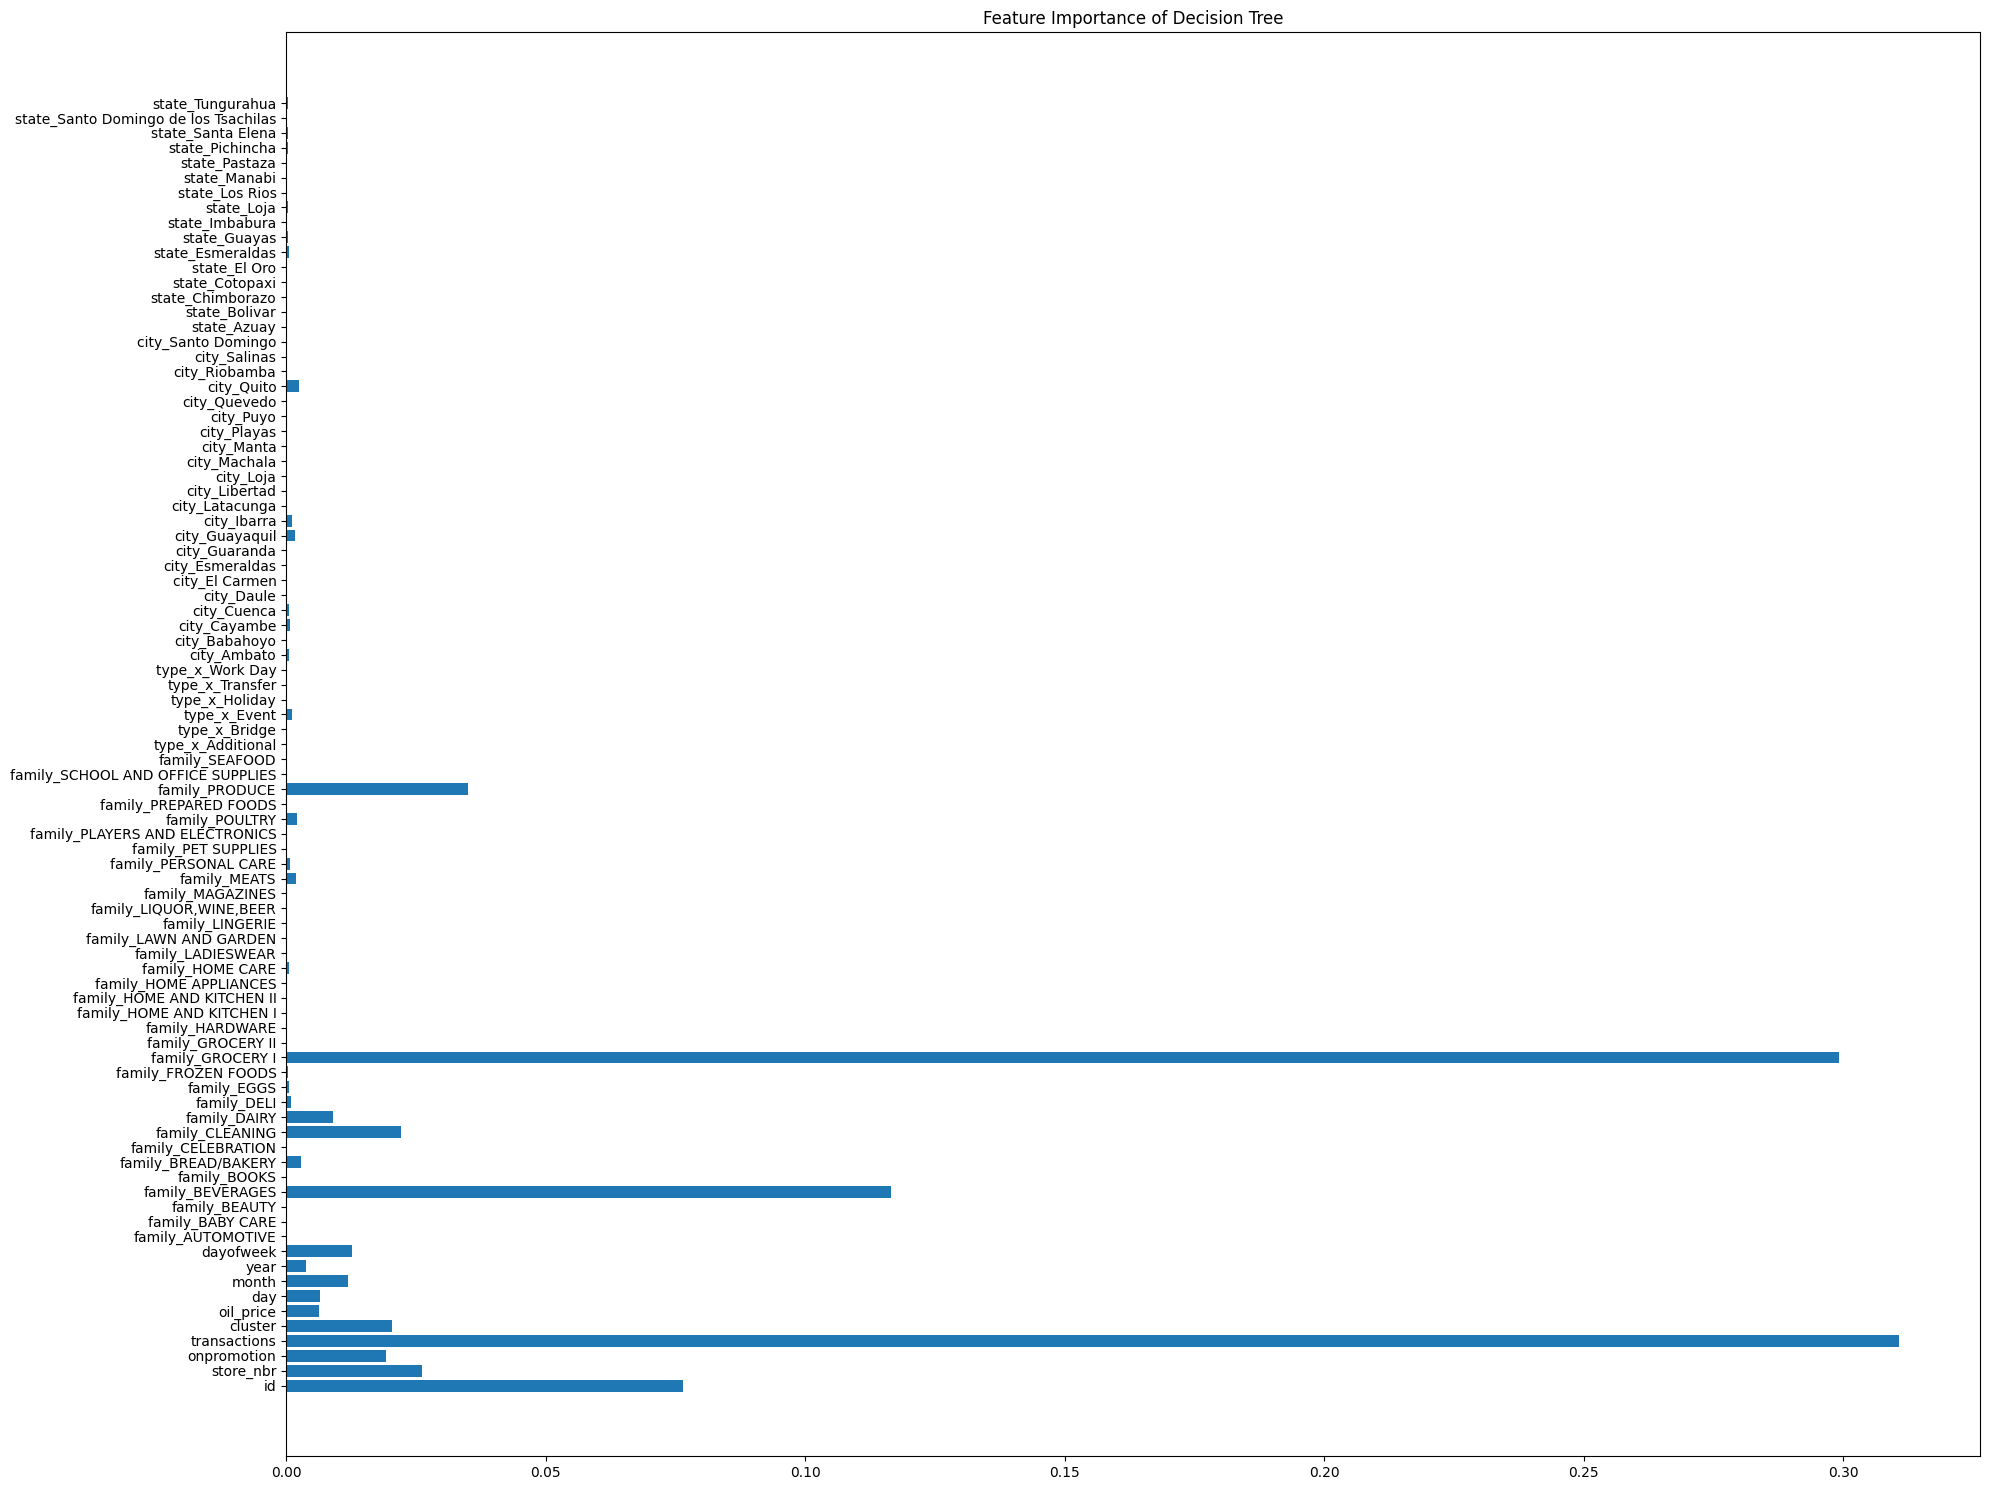

In [ ]:
plt.figure(figsize=(20, 15))
plt.barh(X.columns, model_tree.feature_importances_)
plt.title("Feature Importance of Decision Tree")
plt.tight_layout()
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
lin_model = LinearRegression()
model_lin = lin_model.fit(X_train, y_train)

# Step 8: Make prediction
lin_pred = model_lin.predict(X_test)


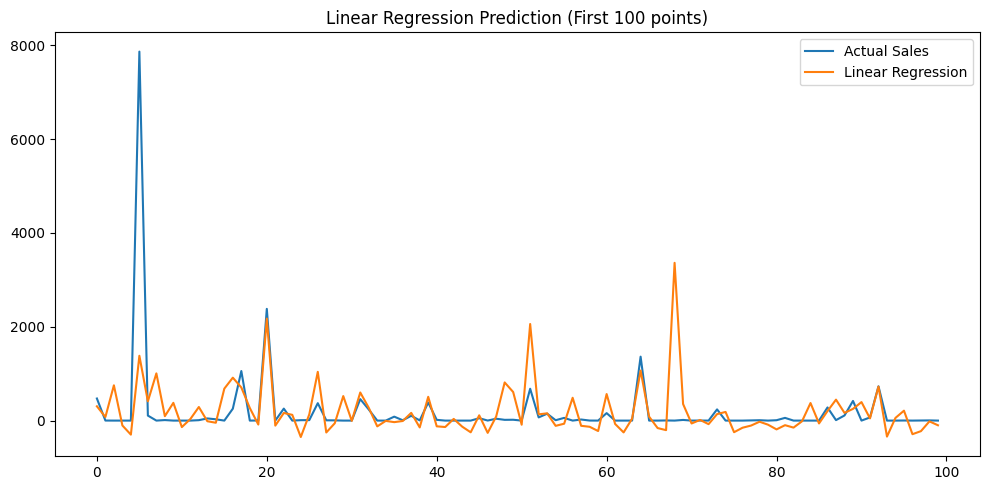

    Model            MSE    RMSE
0  Linear  492207.817236  701.58


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual Sales')
plt.plot(lin_pred[:100], label='Linear Regression')
plt.legend(loc='best')
plt.title('Linear Regression Prediction (First 100 points)')
plt.tight_layout()
plt.show()

# Step 10: Metrics
mse = mean_squared_error(y_test, lin_pred)
rmse = np.sqrt(mse).round(2)

# Step 11: Show results
results = pd.DataFrame([['Linear', mse, rmse]], columns=['Model', 'MSE', 'RMSE'])
print(results)

In [ ]:
x=train1['sales']
X_train, X_test = x[:1673], x[1673:]
print(len(X_train), len(X_test))
print(len(x), len(X_train)+len(X_test))

1673 11
1684 1684


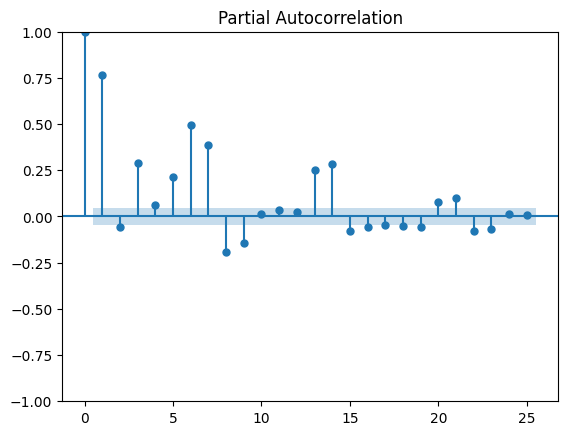

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(X_train,lags = 25)

In [ ]:
pred = armodel.predict(
    start=len(X_train),
    end=len(x)-1,
    dynamic=False
)
pred

,0
1673,1.020061e+06
1674,1.025131e+06
1675,9.001535e+05
1676,9.291524e+05
1677,9.096770e+05
1678,7.668515e+05
1679,8.137930e+05
1680,9.671288e+05
1681,9.658426e+05
1682,8.812343e+05


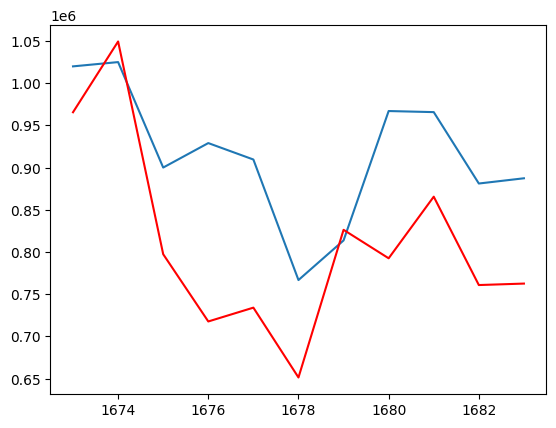

In [ ]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(X_test, color='red')

In [ ]:
model_results = pd.DataFrame([['AR', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])

# Step 1: Check if 'results' exists — if not, create it
try:
    results
except NameError:
    results = pd.DataFrame(columns=['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])

# Step 2: Create the new result row
model_results = pd.DataFrame([['AR', mse, msle, rmse, rmsle]],
                             columns=['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])

# Step 3: Use pd.concat() instead of append
results = pd.concat([results, model_results], ignore_index=True)

# Step 4: Display results
print(results)


    Model           MSE       RMSE      MSLE    RMSLE
0  Linear  1.578362e+10  125632.89       NaN      NaN
1      AR  1.578362e+10  125632.89  0.023071  0.15189
